In [18]:
import datetime
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns
import yfinance as yfin
from datetime import date 
import scipy.stats as stats
pd.options.display.float_format = '{:,.6f}'.format

In [3]:
#Set up start and end date
start = datetime.date(2019,8,1)
end = datetime.date(2024,8,1)
df = yfin.download(['AMZN', 'F', 'BTC-USD'], start, end, auto_adjust = False)['Close']

#Convert DF index to timezone aware (UTC)
df.index = df.index.tz_localize('UTC')

[*********************100%***********************]  3 of 3 completed


In [ ]:
df.head(10)
df.describe()

Ticker,AMZN,BTC-USD,F
Date,,,
2019-08-01 00:00:00+00:00,92.765999,"10,399.668945",9.310000
2019-08-02 00:00:00+00:00,91.162003,"10,518.174805",9.280000
2019-08-03 00:00:00+00:00,NaN,"10,821.726562",NaN
2019-08-04 00:00:00+00:00,NaN,"10,970.184570",NaN
2019-08-05 00:00:00+00:00,88.256500,"11,805.653320",9.230000
2019-08-06 00:00:00+00:00,89.391502,"11,478.168945",9.480000
2019-08-07 00:00:00+00:00,89.669998,"11,941.968750",9.530000
2019-08-08 00:00:00+00:00,91.644501,"11,966.407227",9.560000
2019-08-09 00:00:00+00:00,90.378998,"11,862.936523",9.450000


In [8]:
#To locate the date where amazon stock price is at 200
df[df['AMZN'] == 200]

Ticker,AMZN,BTC-USD,F
Date,,,
2024-07-02 00:00:00+00:00,200.000000,"62,029.015625",12.870000
2024-07-05 00:00:00+00:00,200.000000,"56,662.375000",12.840000


### Plotting the prices in 2023

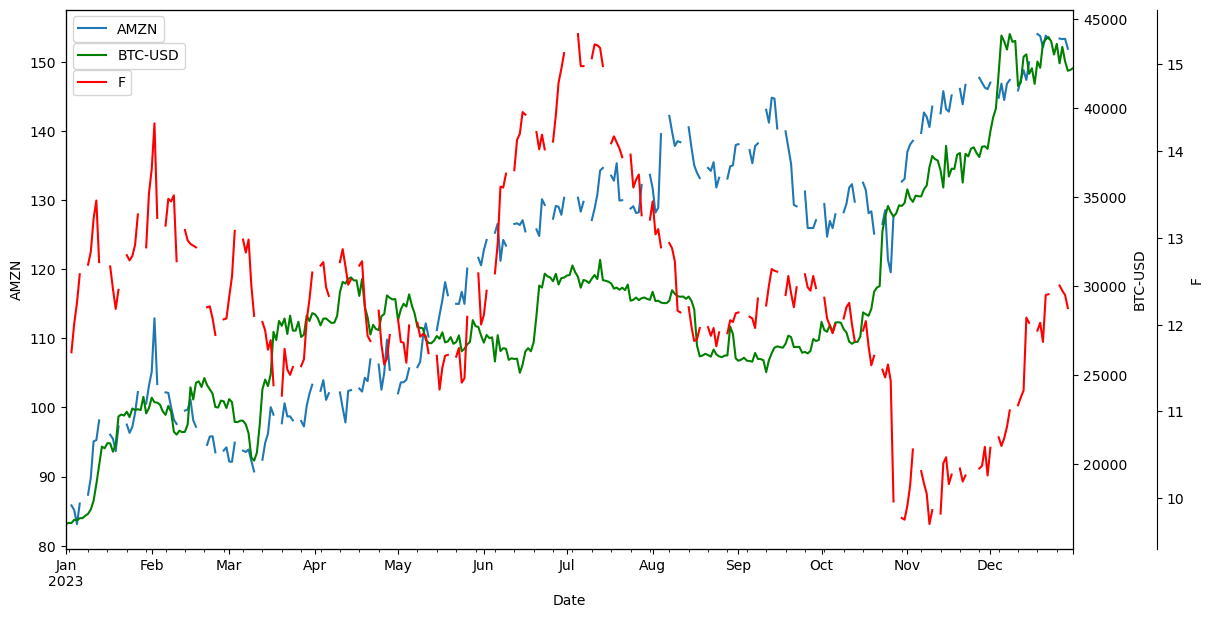

In [16]:
plt.close()
#Same x axis but different y axis
fig = plt.figure(figsize=(13,7))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
#Plot the data
df["2023-01-01":"2023-12-31"].plot(ax=ax1, y='AMZN', legend = True)
df["2023-01-01":"2023-12-31"].plot(ax=ax2, y='BTC-USD', legend = True, color='g')
df["2023-01-01":"2023-12-31"].plot(ax=ax3, y='F', legend = True, color = 'r')

#Label axes
ax1.set_ylabel('AMZN')
ax2.set_ylabel('BTC-USD')
ax3.set_ylabel('F')
ax3.spines['right'].set_position(('outward', 60))

#Set legends
ax1.legend(['AMZN'], loc='upper left')
ax2.legend(['BTC-USD'], loc='upper left', bbox_to_anchor = (0, 0.95))
ax3.legend(['F'], loc = 'upper left', bbox_to_anchor = (0,0.9))

plt.show()

In [17]:
first_row = df.iloc[0]
amzn_price = first_row["AMZN"]
btc_price = first_row['BTC-USD']
f_price = first_row['F']

print('Purchase Price of AMZN : ', np.round(amzn_price, 3))
print('Purchase Price of F : ', np.round(f_price, 3))
print('Purchase Price of BTC : ', np.round(btc_price, 3))

amzn_shares = 1000/amzn_price
btc_shares = 1000/btc_price
f_shares = 1000/f_price

print('Number of Amazon Shares : ', np.round(amzn_shares, 3))
print('Number of Bitcoin Shares : ', np.round(btc_shares, 3))
print('Number of Ford Shares : ', np.round(f_shares, 3))

Purchase Price of AMZN :  92.766
Purchase Price of F :  9.31
Purchase Price of BTC :  10399.669
Number of Amazon Shares :  10.78
Number of Bitcoin Shares :  0.096
Number of Ford Shares :  107.411


In [22]:
last_row = df.iloc[-1]
amzn_price_end = last_row['AMZN']
btc_price_end = last_row['BTC-USD']
f_price_end = last_row['F']

amzn_value = amzn_price_end*amzn_shares
btc_value = btc_price_end*btc_shares
f_value = f_price_end*f_shares

print('End Holding Value of amazon', np.round(amzn_value, 2))
print('End Holding Value of Bitcoin', np.round(btc_value, 2))
print('End Holding Value of Ford', np.round(f_value, 2))

End Holding Value of amazon 2015.61
End Holding Value of Bitcoin 6213.59
End Holding Value of Ford 1162.19


In [25]:
amzn_return = (amzn_value-1000)/1000
f_return = (f_value-1000)/1000
btc_return = (btc_value - 1000)/1000
print('Simple return of AMZN', np.round(amzn_return*100, 2), '%')
print('Simple return of BTC-USD', np.round(btc_return*100, 2), '%')
print('Simple return of Ford', np.round(f_return*100, 2), '%')

Simple return of AMZN 101.56 %
Simple return of BTC-USD 521.36 %
Simple return of Ford 16.22 %


In [26]:
df = df.join(yfin.download(['BLV'], start, end, auto_adjust = False)['Close'].tz_localize('UTC'))
df

[*********************100%***********************]  1 of 1 completed


Ticker,AMZN,BTC-USD,F,BLV
Date,,,,
2019-08-01 00:00:00+00:00,92.765999,"10,399.668945",9.310000,98.550003
2019-08-02 00:00:00+00:00,91.162003,"10,518.174805",9.280000,99.239998
2019-08-03 00:00:00+00:00,NaN,"10,821.726562",NaN,NaN
2019-08-04 00:00:00+00:00,NaN,"10,970.184570",NaN,NaN
2019-08-05 00:00:00+00:00,88.256500,"11,805.653320",9.230000,100.089996
...,...,...,...,...
2024-07-27 00:00:00+00:00,NaN,"67,813.335938",NaN,NaN
2024-07-28 00:00:00+00:00,NaN,"68,255.867188",NaN,NaN
2024-07-29 00:00:00+00:00,183.199997,"66,819.914062",11.010000,71.599998


In [ ]:
#Dropnas and calculate returns : 
returns_stocks_BLV = df[['AMZN', 'F', 'BLV']].dropna().pct_change() #we need to dropna to calculate retunrs
returns_BTC = df[['BTC-USD']].pct_change() #stocks are traded 7/7
returns_stocks = returns_stocks_BLV.reindex(returns_BTC.index) #Reintroduce weekends
returns = returns_BTC.join(returns_stocks_BLV, how='outer')[1:]
returns

Ticker,BTC-USD,AMZN,F,BLV
Date,,,,
2019-08-02 00:00:00+00:00,0.011395,-0.017291,-0.003222,0.007001
2019-08-03 00:00:00+00:00,0.028860,NaN,NaN,NaN
2019-08-04 00:00:00+00:00,0.013719,NaN,NaN,NaN
2019-08-05 00:00:00+00:00,0.076158,-0.031872,-0.005388,0.008565
2019-08-06 00:00:00+00:00,-0.027740,0.012860,0.027086,0.006694
...,...,...,...,...
2024-07-27 00:00:00+00:00,-0.001454,NaN,NaN,NaN
2024-07-28 00:00:00+00:00,0.006526,NaN,NaN,NaN
2024-07-29 00:00:00+00:00,-0.021038,0.003836,-0.016086,0.003785


In [29]:
returns.describe()

Ticker,BTC-USD,AMZN,F,BLV
count,"1,826.000000","1,257.000000","1,257.000000","1,257.000000"
mean,0.001579,0.000803,0.000506,-0.000203
std,0.033707,0.022175,0.027823,0.009231
min,-0.371695,-0.140494,-0.183614,-0.075169
25%,-0.013480,-0.011068,-0.013672,-0.005378
50%,0.000234,0.000643,0.000000,0.000455
75%,0.015996,0.012222,0.014115,0.005179
max,0.187465,0.135359,0.234414,0.049139


In [30]:
(returns.describe())[['BTC-USD', 'F']]

Ticker,BTC-USD,F
count,"1,826.000000","1,257.000000"
mean,0.001579,0.000506
std,0.033707,0.027823
min,-0.371695,-0.183614
25%,-0.013480,-0.013672
50%,0.000234,0.000000
75%,0.015996,0.014115
max,0.187465,0.234414


In [ ]:
#Annualize returns for BTC (365 trading days)
(np.prod(returns_BTC + 1, axis = 0) ** (1/len(returns_BTC)))**365-1

Ticker
BTC-USD   0.440439
dtype: float64

In [33]:
#Annualize for stocks (252 trading days)
(np.prod(returns_stocks_BLV + 1, axis=0) ** (1/len(returns_stocks_BLV))) ** 252 -1

Ticker
AMZN    0.150742
F       0.030567
BLV    -0.059901
dtype: float64

In [ ]:
blv_price = df.iloc[0]['BLV']
blv_end_price = df.iloc[-1]['BLV']

#Calculate the return
blv_return = blv_end_price/blv_price
print(f'BLV return over the period was {np.round((blv_return - 1)*100, 2)}%')


BLV return over the period was -26.53%


### Working with indices

In [37]:
start = datetime.date.today()-datetime.timedelta(365*5)
end = datetime.date.today()

#Pull data
prices = yfin.download(['^GSPC', '^RUT'], start, end, auto_adjust=False)['Close']
prices = prices.rename(columns={'^GSPC' : 'SP500', '^RUT' : 'Russell2000'})

prices.describe()

[*********************100%***********************]  2 of 2 completed


Ticker,SP500,Russell2000
count,"1,257.000000","1,257.000000"
mean,"4,393.325451","1,955.627732"
std,791.385691,272.606345
min,"2,470.500000","1,052.050049"
25%,"3,901.820068","1,781.829956"
50%,"4,300.169922","1,979.109985"
75%,"4,766.180176","2,197.449951"
max,"6,144.149902","2,442.739990"


In [38]:
df.head(7)

Ticker,AMZN,BTC-USD,F,BLV
Date,,,,
2019-08-01 00:00:00+00:00,92.765999,"10,399.668945",9.310000,98.550003
2019-08-02 00:00:00+00:00,91.162003,"10,518.174805",9.280000,99.239998
2019-08-03 00:00:00+00:00,NaN,"10,821.726562",NaN,NaN
2019-08-04 00:00:00+00:00,NaN,"10,970.184570",NaN,NaN
2019-08-05 00:00:00+00:00,88.256500,"11,805.653320",9.230000,100.089996
2019-08-06 00:00:00+00:00,89.391502,"11,478.168945",9.480000,100.760002
2019-08-07 00:00:00+00:00,89.669998,"11,941.968750",9.530000,100.930000


### no NaN because indices weekends are automatically removed


In [47]:
#Calculate log returns
df = np.log(prices)-np.log(prices.shift(1))
df=df.iloc[1:, 0:]
df.head()

Ticker,SP500,Russell2000
Date,,
2020-03-31,-0.016142,-0.004517
2020-04-01,-0.045146,-0.072937
2020-04-02,0.022573,0.012810
2020-04-03,-0.015253,-0.031586
2020-04-06,0.067968,0.079217


In [49]:
avg_returns = df.mean()*252

future_value_sp500 = 1000*np.exp(avg_returns["SP500"]*5)
future_value_russell = 1000*np.exp(avg_returns["Russell2000"]*5)

print(f'Future value of SP500 : {future_value_sp500}')
print(f'Future value of Russell2000 : {future_value_russell}')

Future value of SP500 : 2129.8427068778565
Future value of Russell2000 : 1749.833511256549


In [53]:
prices.max()
prices.min()
prices.max()-prices.min()

Ticker
SP500         3,673.649902
Russell2000   1,390.689941
dtype: float64

In [55]:
end = pd.Timestamp(end).tz_localize(None) #Remove timezone info
currYear = prices.loc[pd.Timestamp(end-datetime.timedelta(365)) : end]
currYear.max()-currYear.min()

Ticker
SP500         1,176.919922
Russell2000     499.070068
dtype: float64

In [56]:
(currYear.max()-currYear.min())/prices.iloc[-1]

Ticker
SP500         0.210882
Russell2000   0.246665
dtype: float64

## Moving Averages

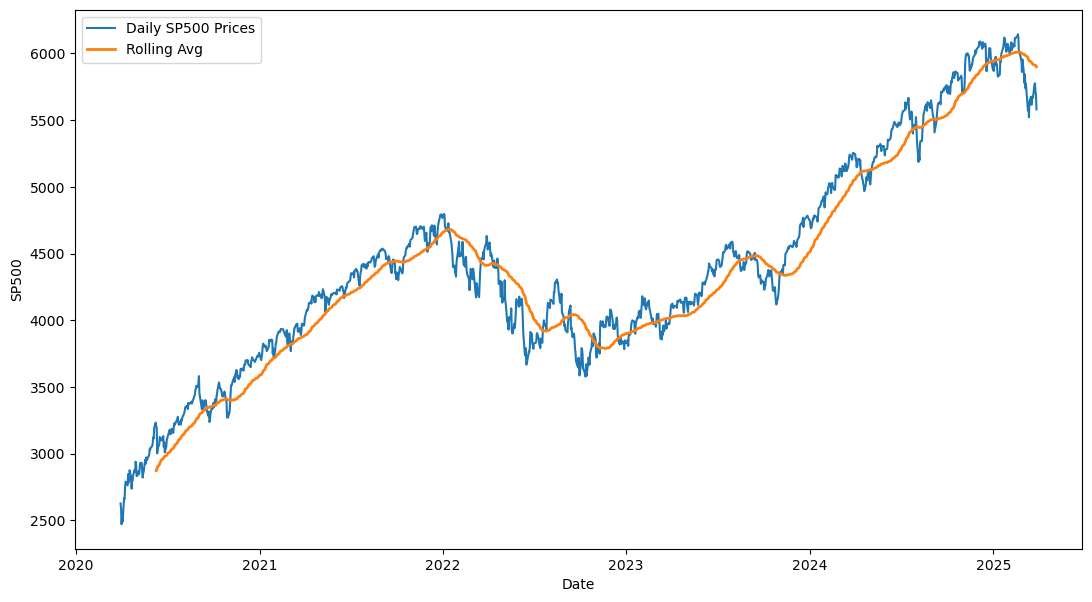

In [59]:
prices['SP500 50 day rolling average'] = prices.SP500.rolling(50).mean()

plt.figure(figsize = (13,7))
sns.lineplot(x='Date', y='SP500', data = prices, label = 'Daily SP500 Prices')
sns.lineplot(x='Date', y='SP500 50 day rolling average', data= prices, label='Rolling Avg', linewidth = 2)
plt.show()


In [60]:
((abs(prices - prices.rolling(50).mean()))/prices).mean()

Ticker
SP500                          0.031590
Russell2000                    0.040998
SP500 50 day rolling average   0.023637
dtype: float64

In [61]:
prices.std()

Ticker
SP500                          791.385691
Russell2000                    272.606345
SP500 50 day rolling average   737.112518
dtype: float64

## Lesson 2

In [3]:
# Starting and end dates
start = datetime.date(2019, 8, 1)
end = datetime.date(2024, 8, 1)

# Get data
df = yfin.download(["^GSPC", "^IXIC", "BTC-USD"], start, end, auto_adjust = False)['Adj Close']

# Display the first five rows
df.head()

[*********************100%***********************]  3 of 3 completed


Ticker,BTC-USD,^GSPC,^IXIC
Date,,,
2019-08-01,"10,399.668945","2,953.560059","8,111.120117"
2019-08-02,"10,518.174805","2,932.050049","8,004.069824"
2019-08-03,"10,821.726562",NaN,NaN
2019-08-04,"10,970.184570",NaN,NaN
2019-08-05,"11,805.653320","2,844.739990","7,726.040039"


In [4]:
# Remove rows with missing values
df.dropna(inplace = True)

# Calculate log returns
df["SP500"] = np.log(df["^GSPC"]) - np.log(df["^GSPC"].shift(1))
df["NASDAQ"] = np.log(df["^IXIC"]) - np.log(df["^IXIC"].shift(1))
df["Bitcoin"] = np.log(df["BTC-USD"]) - np.log(df["BTC-USD"].shift(1))

# Remove original price columns
df.drop(["^GSPC",	"^IXIC", "BTC-USD"], axis = 'columns', inplace = True)

# Remove rows with missing values (again)
df.dropna(inplace = True)

# Display the first five rows
df.head()

Ticker,SP500,NASDAQ,Bitcoin
Date,,,
2019-08-02,-0.007309,-0.013286,0.011331
2019-08-05,-0.030230,-0.035354,0.115474
2019-08-06,0.012933,0.013784,-0.028132
2019-08-07,0.000767,0.003767,0.039612
2019-08-08,0.018588,0.022178,0.002044


In [5]:
df.cov()

Ticker,SP500,NASDAQ,Bitcoin
Ticker,,,
SP500,0.000181,0.000203,0.000200
NASDAQ,0.000203,0.000254,0.000253
Bitcoin,0.000200,0.000253,0.001726


In [6]:
round(df.corr(), 3)

Ticker,SP500,NASDAQ,Bitcoin
Ticker,,,
SP500,1.000000,0.947000,0.358000
NASDAQ,0.947000,1.000000,0.381000
Bitcoin,0.358000,0.381000,1.000000


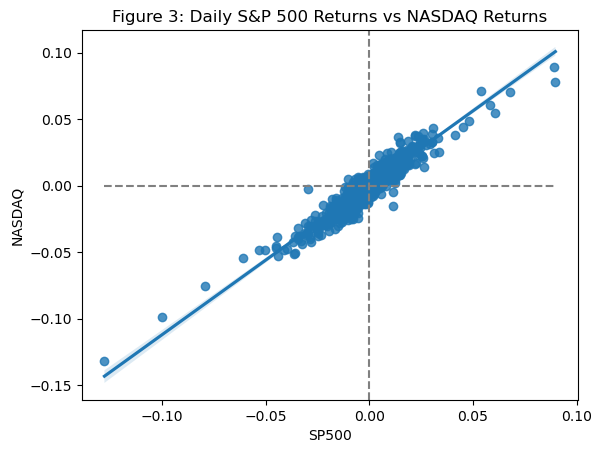

In [9]:
# Create scatter plot with regression line
chart = sns.regplot(x="SP500", y="NASDAQ", data=df).set(
    title="Figure 3: Daily S&P 500 Returns vs NASDAQ Returns"
)

# Add vertical line at x=0 and horizontal line at y=0
plt.axvline(0, 0, 1, dash_capstyle="butt", linestyle="--", color="grey")
plt.plot([min(df.SP500), max(df.SP500)], [0, 0], linestyle="--", color="grey");

In [10]:
# Calculates the Sharpe Ratios for both the S&P 500 and Bitcoin
Sharpe_Ratio_SP500 = df["SP500"].mean() / df["SP500"].std()
Sharpe_Ratio_Bitcoin = df["Bitcoin"].mean() / df["Bitcoin"].std()

# Print the results
print("Sharpe Ratio of S&P 500: ", round(Sharpe_Ratio_SP500, 5))
print("Sharpe Ratio of Bitcoin: ", round(Sharpe_Ratio_Bitcoin, 5))


Sharpe Ratio of S&P 500:  0.03699
Sharpe Ratio of Bitcoin:  0.03498


### *Semivariance* : 
Looks only at downside risk : variance of the returns less than the average 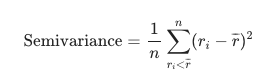


In [11]:
# Calculate the mean return for each
sp500mean = df["SP500"].mean()
BTCmean = df["Bitcoin"].mean()

# Calculate semivariance for each
sp500_semivariance = ((df[df["SP500"] < sp500mean]["SP500"] - sp500mean) ** 2).mean()
BTC_semivariance = ((df[df["Bitcoin"] < BTCmean]["Bitcoin"] - BTCmean) ** 2).mean()

# Print the semivariance results
print("Semivariance of S&P 500: ", round(sp500_semivariance, 5))
print("Semivariance of Bitcoin: ", round(BTC_semivariance, 5))

Semivariance of S&P 500:  0.00021
Semivariance of Bitcoin:  0.00181


### **Stock Returns Distribution**

In [12]:
# Starting and end dates
start = datetime.date(2004, 8, 1)
end = datetime.date(2024, 8, 1)

# Get the data
prices = pd.DataFrame(yfin.download(["^GSPC"], start, end, auto_adjust = False)["Adj Close"])

# Rename column to make names more intuitive
prices = prices.rename(columns={"^GSPC": "SP500"})
df = np.log(prices) - np.log(prices.shift(1))
df = df.iloc[1:, 0:]

[*********************100%***********************]  1 of 1 completed


In [13]:
len(df[df.SP500>df.SP500.mean()])/len(df)

0.5235446056030201

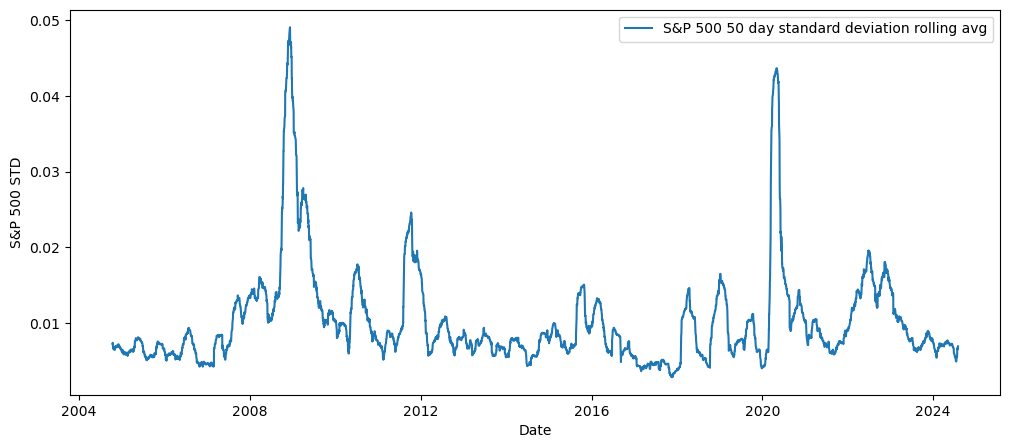

In [14]:
# Calculate rolling standard deviation
vols = pd.DataFrame(df.SP500.rolling(50).std()).rename(columns={"SP500": "S&P 500 STD"})

# set figure size and plot rolling standard deviations
plt.figure(figsize=(12, 5))
sns.lineplot(
    x="Date",
    y="S&P 500 STD",
    data=vols,
    label="S&P 500 50 day standard deviation rolling avg",
)
plt.show()

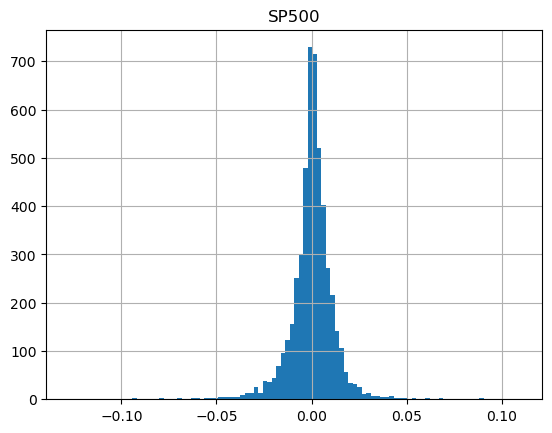

In [16]:
df.hist(bins=100);

In [19]:
stats.normaltest((np.array(df.SP500)))

NormaltestResult(statistic=1234.7310969195057, pvalue=7.612880045350763e-269)

In [20]:
stats.jarque_bera(np.array(df.SP500)).pvalue

0.0

In [ ]:
dfmax = df.SP500.max()
dfmin = df.SP500.min()
num_dev_max = (dfmax-df.SP500.mean())/df.SP500.std()
num_dev_min = (dfmin-df.SP500.mean())/df.SP500.std()
num_dev_max, num_dev_min
#Gives out the z scores : high mean fat tails

(9.049700788156429, -10.600249247355066)

In [23]:
stats.norm.cdf(-10.6)

1.4899011272964664e-26

In [34]:
upper = (3*df.SP500.std())+df.SP500.mean()
lower = df.SP500.mean()-(3*df.SP500.std())


In [31]:
len(df[(df.SP500<lower) | (df.SP500 > upper)])


5032

In [36]:
len(df[(df["SP500"] < lower)| (df["SP500"] > upper)]), 0.003*len(df)

(84, 15.099)

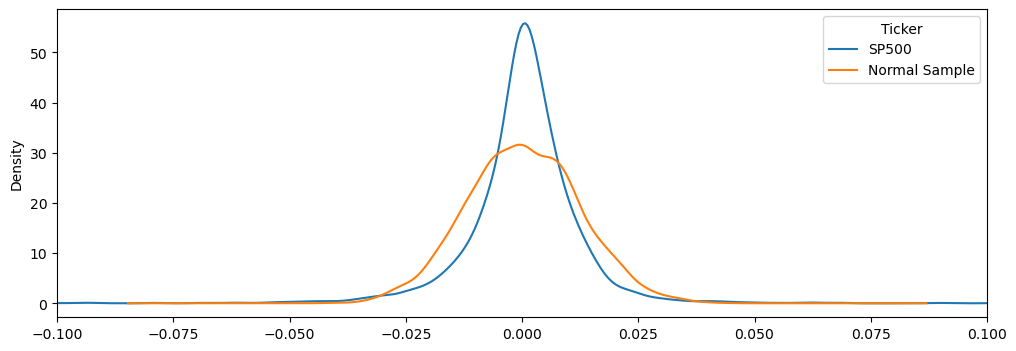

In [37]:
#KDE of SP500 stocks
np.random.seed(22)
normal_dist = stats.norm.rvs(size=len(df["SP500"]), loc=df["SP500"].mean(), scale=df["SP500"].std())

df['Normal Sample'] = normal_dist

df[['SP500', 'Normal Sample']].plot(kind='kde', xlim = (-0.1, 0.1), figsize = (12,4));

In [39]:
df.SP500.kurt()

13.180839169084926

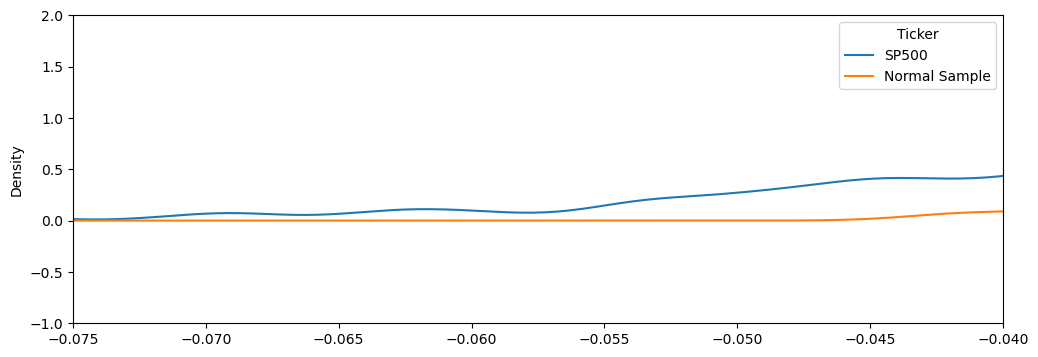

In [45]:
df[['SP500', 'Normal Sample']].plot(kind = 'kde', xlim = (-0.075, -0.04), ylim = (-1, 2), figsize = (12,4));

ValueError: too many values to unpack (expected 2)

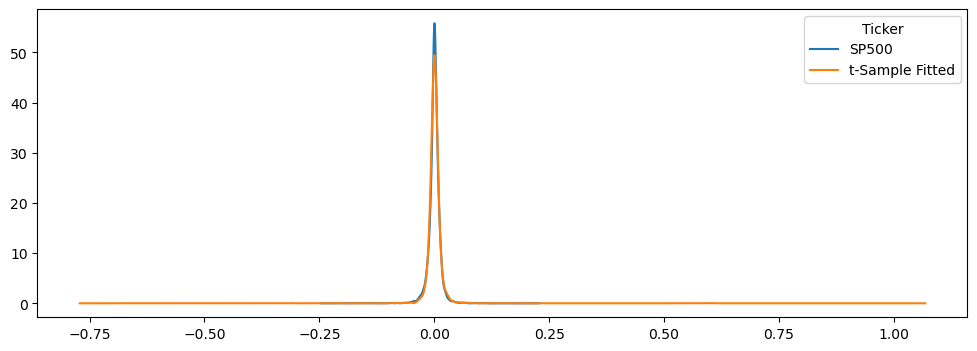

In [49]:
params = stats.t.fit(df.SP500)

df['t-Sample Fitted'] = stats.t.rvs(*params, size = len(df))
df[['SP500', 't-Sample Fitted']].plot(kind = 'kde', figsize = (12,4), xlim = (-0.1, 0,1));
df[['SP500', 't-Sample Fitted']].plot(kind = 'kde', figsize = (12,4), xlim = (-0.1, 0.1));

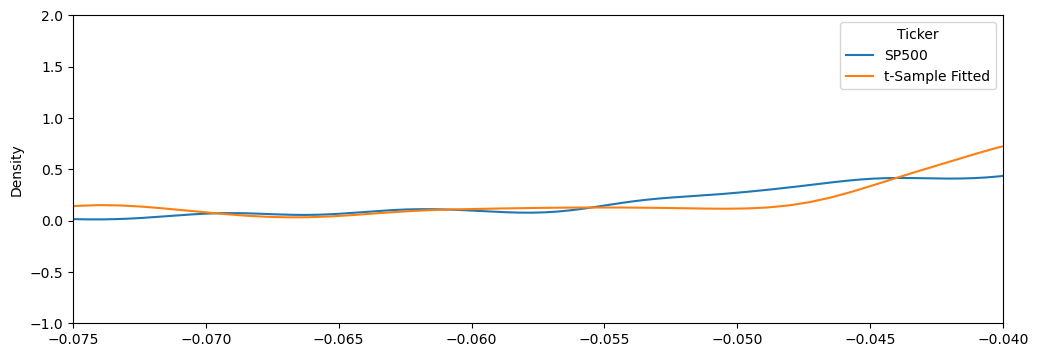

In [48]:
df[['SP500', 't-Sample Fitted']].plot(kind = 'kde', figsize = (12,4), xlim = (-0.075, -0.04), ylim = (-1, 2));